In [34]:
import torch
import torchvision
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import numpy as np 
from torchvision.datasets import MNIST
from scipy.spatial.distance import cdist
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd 
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

In [35]:
with open('./data/Bio_data/Gevers2014/Gevers2014_meta.txt', 'r') as file:
    meta = file.read()

# Split the contents into lines
meta_lines = meta.split('\n')

# Remove empty lines and strip whitespace
meta_lines = [line.strip() for line in meta_lines if line.strip()]

# Split each line by tabs to create columns
meta_data = [line.split('\t') for line in meta_lines]

# Create a pandas DataFrame from the list of lists
meta_df = pd.DataFrame(meta_data)

# Count the number of rows and columns
num_rows, num_columns = meta_df.shape

# Print the counts
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display the first few rows of the DataFrame for inspection
print(meta_df.head())

csv_file_path = './data/Bio_data/Gevers2014/Gevers2014_meta.csv'

# Save the DataFrame as a CSV file
meta_df.to_csv(csv_file_path, index=False,header=0)

# Print a message to confirm that the file has been saved
print(f"DataFrame saved as {csv_file_path}")



Number of rows: 1360
Number of columns: 70
                   0                1                     2   \
0           #SampleID  BarcodeSequence  LinkerPrimerSequence   
1  SKBTI.1325.1246591             None   GTGCCAGCMGCCGCGGTAA   
2      121283.1246600             None   GTGCCAGCMGCCGCGGTAA   
3  SKBTI.0870.1246169             None   GTGCCAGCMGCCGCGGTAA   
4  SKBTI.1178.1246304             None   GTGCCAGCMGCCGCGGTAA   

                   3                  4                  5          6   \
0  TARGET_SUBFRAGMENT  ASSIGNED_FROM_GEO  EXPERIMENT_CENTER      TITLE   
1                  V4                  n                 BI  CCFA_RISK   
2                  V4                  n                 BI  CCFA_RISK   
3                  V4                  n                 BI  CCFA_RISK   
4                  V4                  n                 BI  CCFA_RISK   

                      7            8           9   ...                 60  \
0             RUN_PREFIX          AGE  MESALAMINE 

In [36]:
with open('./data/Bio_data/Gevers2014/otutable.txt', 'r') as file:
    OTU = file.read()

# Split the contents into lines
OTU_lines = OTU.split('\n')

# Remove empty lines and strip whitespace
OTU_lines = [line.strip() for line in OTU_lines if line.strip()]

# Split each line by tabs to create columns
OTU_data = [line.split('\t') for line in OTU_lines]

# Create a pandas DataFrame from the list of lists
OTU_df = pd.DataFrame(OTU_data)

# Count the number of rows and columns
num_rows, num_columns = OTU_df.shape

# Print the counts
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

# Display the first few rows of the DataFrame for inspection
print(OTU_df.head())
csv_file_path = './data/Bio_data/Gevers2014/Gevers2014_OTU.csv'

# Save the DataFrame as a CSV file
OTU_df.to_csv(csv_file_path, index=False,header=0)

# Print a message to confirm that the file has been saved
print(f"DataFrame saved as {csv_file_path}")

Number of rows: 944
Number of columns: 1359
                                                0               1     \
0                                            #OTU ID  100052.1246453   
1  NR_112946.1_Bacteroides_vulgatus_strain_JCM_58...            1373   
2  NR_041351.1_Bacteroides_dorei_strain_175_16S_r...              17   
3  NR_041342.1_Parabacteroides_distasonis_strain_...               0   
4  NR_025930.1_Ruminococcus_bromii_strain_ATCC_27...               0   

             2               3               4               5     \
0  100216.1246217  100211.1246832  100083.1246311  100095.1246168   
1            2669               0             311               1   
2            1993               1             165             623   
3             814               0               0              34   
4               0               1               0               0   

             6               7               8               9     ...  \
0  100043.1246460  100212.1247085 

In [37]:
# Define the path to the CSV file
csv_file_path = './data/Bio_data/Gevers2014/Gevers2014_meta.csv'
csv_file_path2 = './data/Bio_data/Gevers2014/Gevers2014_OTU.csv'

# Read the CSV file into a DataFrame
meta_df = pd.read_csv(csv_file_path)
OTU_df = pd.read_csv(csv_file_path2)


In [20]:
# Read the CSV file into a DataFrame
meta_df = pd.read_csv(csv_file_path)

# Use value_counts() to count unique values in the 'TARGET_SUBFRAGMENT' column
value_counts = meta_df['TARGET_SUBFRAGMENT'].value_counts()

# Display the unique values and their counts
print(value_counts)

V4    1359
Name: TARGET_SUBFRAGMENT, dtype: int64


In [72]:
OTU_df = OTU_df.T
OTU_df = OTU_df.iloc[1:, 1:]
OTU_df








,100216.1246217,100211.1246832,100083.1246311,100095.1246168,100043.1246460,100212.1247085,100206.1246938,122057.1246885,100077.1246422,MGH101003.1247243,...,SKBTI.0767.1246917,121180.1246978,MGH106271.1246160,SKBTI.0652.1246739,SKBTI.0593.1247128,SKBTI.0914.1246971,SKBTI.0448.1246164,SKBTI.0939.1246784,SKBTI.0692.1246233,SKBTI.0362.1246358
2,814,0,0,34,0,0,0,16,14,81,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,122,1,1,102,4,0,0,8,69,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,57,45,0,17,0,4,0,6,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0,0,0,0,0,0,0,0,18,0,...,0,0,0,0,0,0,0,0,0,0
939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Define your VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, latent_dim * 2)  # Mean and log-variance for the latent space
        )

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
            nn.Sigmoid()  # Sigmoid activation for output
        )

    def reparameterize(self, mu, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input if needed
        z_params = self.encoder(x)
        mu, log_var = z_params[:, :latent_dim], z_params[:, latent_dim:]
        z = self.reparameterize(mu, log_var)
        reconstruction = self.decoder(z)
        return reconstruction, mu, log_var

# Define dataset shape
input_dim = 1357  # Input dimension
latent_dim = 2  # Latent space dimension

# Create a random dataset for demonstration
data = torch.randn(941, input_dim)

# Create a DataLoader
batch_size = 16
dataset = TensorDataset(data)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define VAE model and optimizer
model = VAE(input_dim, latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Define the loss function
def vae_loss(recon_x, x, mu, log_var):
    reconstruction_loss = nn.functional.mse_loss(recon_x, x, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss + (kl_divergence * 0.01)

# Training loop
num_epochs = 20
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    for batch_data in dataloader:
        batch_data = batch_data[0].to(device)  # Move data to the device

        optimizer.zero_grad()
        recon_batch, mu, log_var = model(batch_data)
        loss = vae_loss(recon_batch, batch_data, mu, log_var)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')


Epoch [1/20], Loss: 17336.9453125
Epoch [2/20], Loss: 17483.107421875
Epoch [3/20], Loss: 17369.60546875
Epoch [4/20], Loss: 18004.85546875
Epoch [5/20], Loss: 17679.28515625
Epoch [6/20], Loss: 17807.65234375
Epoch [7/20], Loss: 17734.201171875
Epoch [8/20], Loss: 17569.423828125
Epoch [9/20], Loss: 17214.9765625
Epoch [10/20], Loss: 17602.822265625
Epoch [11/20], Loss: 18054.380859375
Epoch [12/20], Loss: 17496.494140625
Epoch [13/20], Loss: 17656.892578125
Epoch [14/20], Loss: 17755.15234375
Epoch [15/20], Loss: 17638.275390625
Epoch [16/20], Loss: 18002.474609375
Epoch [17/20], Loss: 17780.466796875
Epoch [18/20], Loss: 17484.234375
Epoch [19/20], Loss: 17527.091796875
Epoch [20/20], Loss: 17466.67578125


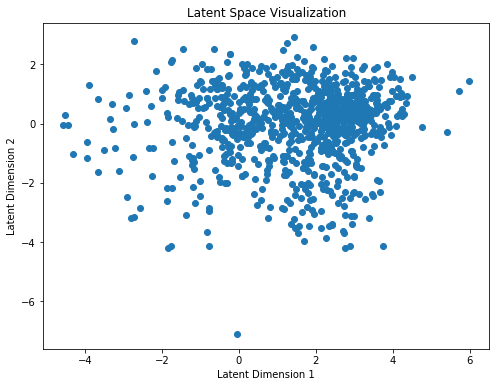

In [99]:
# Define a function to encode data points into the latent space
def encode_data(data_loader, model, device):
    latents = []
    labels = []

    model.eval()
    with torch.no_grad():
        for batch_data in data_loader:
            batch_data = batch_data[0].to(device)
            _, mu, _ = model(batch_data)
            latents.append(mu.cpu().numpy())
    
    return np.concatenate(latents, axis=0)

# Encode the data into the latent space
encoded_data = encode_data(dataloader, model, device)

# Plot the latent space
plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.title('Latent Space Visualization')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()